# ENCHENTES NO ESTADO DO RIO GRANDE DO SUL - BRASIL 

![Foto Canela](fotos_canela2.jpg)

# CIDADE ALVO: Canela - RS

Canela localiza-se na micro-região 309 (RS), nos degraus da encosta infeior nordeste e na extremidade sul da Serra Geral. O município é dividio pelo Rio Caí (Santa Cruz), abrangendo as nascentes do Rio Paranhana (Santa Maria).

O nome da cidade provém de uma árvore, chamada de Canela, então localizada não longe do local onde está atualmente a praça central da cidade, a Praça João Corrêa, esta caneleira servia de ponto de encontro e pousada de tropeiros. 

__SAIBA MAIS:__ https://canela.rs.gov.br/cidade/

__CANELA É UMA DAS CIDADES COM ORDEM PARA OS MORADORES DEIXAREM SUAS CASAS__, ASSIM COMO:
- SÃO FRANCISCO DE PAULA;
- GRAMADO;
- NOVA PETRÓPOLIS;
- FELIZ;
- VALE REAL;
- SANTA TEREZA;
- MUÇUM;
- ROCA SALES;
- ENCANTADO;
- ARROIO DO MEIO;
- COLINAS;
- LAEJADO.

ALÉM DESSAS CIDADES EXISTEM OUTROS LOCAIS QUE FORAM AFETADOS, CONFIRA:  
https://oglobo.globo.com/brasil/noticia/2024/05/06/chuvas-no-rs-veja-mapa-com-as-cidades-mais-afetadas-pelas-enchentes.ghtml

### DENTRE TANTAS CIDADES ATINGIDAS PORQUE ANALISAR CANELA-RS?

1. Canela-RS foi uma das cidades mais atingidas pelas enchentes, inclusive com moradores desalojados;
2. Possui uma estação automática do Instituto Nacional de Meteorologia (INMET) com dados sendo coletados desde 2008;
3. A primeira opção seria analisar os dados da estação de Porto Alegre - RS no Jardim Botânico, contudo:
    - A Estação é localizada na Zona Sul de Porto Alegre, próxima a áreas verdes e com menor influência da urbanização.
    - Devido à sua localização, a estação do Jardim Botânico tende a registrar temperaturas ligeiramente mais amenas, menor amplitude térmica e umidade do ar um pouco mais elevada.
    - A pluviometria média anual no Jardim Botânico costuma ser um pouco mais alta do que outras áreas, devido à influência da vegetação e da brisa vinda do Guaíba.
    - Porto Alegre - RS possuí uma outra estação do INMET em Belem Novo mas, a estação começou a coletar dados apenas em dezembro de 2022.  

Portanto, além de Canela ser uma das cidades mais afetadas pelas enchentes no RS, se destaca por possuir mais dados históricos (desde 2008) provenientes da estação automática A879 para serem analisados.

Catálogo de estações automáticas do INMET: https://portal.inmet.gov.br/paginas/catalogoaut

### [+] NOTÍCIAS SOBRE A CIDADE:
- https://canela.rs.gov.br/noticia/prefeitura-trabalha-em-diversas-frentes-para-minimizar-os-estragos-das-chuvas/
- https://canela.rs.gov.br/noticia/chuvas-desencadeiam-uma-onda-de-solidariedade-em-canela/
- https://oglobo.globo.com/brasil/noticia/2024/05/02/governador-eduardo-leite-alerta-moradores-de-canela-e-gramado-para-sairem-de-casa-orientacao-expressa.ghtml
- https://www.cnnbrasil.com.br/nacional/risco-de-deslizamento-em-barragem-coloca-6-cidades-em-alerta-no-rs-prefeituras-evacuam-areas/
- https://www.terra.com.br/planeta/noticias/chuva-faz-rio-grande-do-sul-pedir-para-moradores-de-gramado-e-canela-sairem-de-areas-de-risco,544c26c0e79fd97a2c86b831a3dce9afcwkfmvk2.html
- https://gauchazh.clicrbs.com.br/pioneiro/geral/noticia/2024/05/mais-18-pessoas-sao-retiradas-de-casa-em-canela-por-risco-de-deslizamento-de-terra-clw2mqm8s010t011h7eiz9d9p.html
- https://www.youtube.com/watch?v=YDtY5OIUslI
- https://www.youtube.com/watch?v=ta54qyrG1yg

# INÍCIO DA ANÁLISE DE DADOS

In [1]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Para os gráficos extras
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

# Para verificar a distribuição dos dados
from scipy.stats import kstest

# Para verificar o encoding das tabelas
import chardet

# Para converter horário UTC
from datetime import datetime, timedelta

# Para regressão linear simples
import statsmodels.api as sm

# Para regressão
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Para regressão logistica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Para regressão não linear
from sklearn.preprocessing import PolynomialFeatures

# Séries temporais
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# IMPORTAR ARQUIVO .CSV

In [2]:
# Verificar encoding para fazer a importação dos dados correta
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# ISO-8859-1 -> encoding do arquivo csv
encoding = detect_encoding('canela_rs_A879_2008-08-22_2024-04-30.csv')

# Importando arquivos csv
df = pd.read_csv('canela_rs_A879_2008-08-22_2024-04-30.csv', encoding=encoding, sep=',')

# VISUALIZAR OS NOMES DAS COLS. DO DATAFRAME

### Canela-RS (2008-2024)

In [3]:
df.head()

Data Medicao  PRECIPITACAO TOTAL   DIARIO (AUT)(mm)  \
0   2008-08-22                 NaN                NaN   
1   2008-08-23                 NaN                NaN   
2   2008-08-24                 NaN                NaN   
3   2008-08-25                 NaN                NaN   
4   2008-08-26                 NaN                NaN   

   PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

   TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(째C)  TEMPERATURA MAXIMA  \
0                                                NaN                      NaN   
1                                                NaN                      NaN   
2                                                NaN                      NaN   
3                                                NaN                      NaN   
4                                                NaN                      NaN   

    DIARIA (AUT)(째C)  TEMPERATURA MEDIA   DIARIA (AUT)(째C).1  \
0                NaN                NaN                  NaN   
1                NaN                NaN                  NaN   
2                NaN                NaN                  NaN   
3                NaN                NaN                  NaN   
4                NaN                NaN                  NaN   

   TEMPERATURA MINIMA   DIARIA (AUT)(째C).2  UMIDADE RELATIVA DO AR  \
0                 NaN                  NaN                     NaN   
1                 NaN                  NaN                     NaN   
2                 NaN                  NaN                     NaN   
3                 NaN                  NaN                     NaN   
4                 NaN                  NaN                     NaN   

    MEDIA DIARIA (AUT)(%)  UMIDADE RELATIVA DO AR.1   MINIMA DIARIA (AUT)(%)  \
0                     NaN                       NaN                      NaN   
1                     NaN                       NaN                      NaN   
2                     NaN                       NaN                      NaN   
3                     NaN                       NaN                      NaN   
4                     NaN                       NaN                      NaN   

   VENTO   RAJADA MAXIMA DIARIA (AUT)(m/s)  VENTO.1  \
0    NaN                               NaN      NaN   
1    NaN                               NaN      NaN   
2    NaN                               NaN      NaN   
3    NaN                               NaN      NaN   
4    NaN                               NaN      NaN   

    VELOCIDADE MEDIA DIARIA (AUT)(m/s)  
0                                  NaN  
1                                  NaN  
2                                  NaN  
3                                  NaN  
4                                  NaN

In [4]:
df.columns

Index(['Data Medicao', 'PRECIPITACAO TOTAL', ' DIARIO (AUT)(mm)',
       'PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)',
       'TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(째C)',
       'TEMPERATURA MAXIMA', ' DIARIA (AUT)(째C)', 'TEMPERATURA MEDIA',
       ' DIARIA (AUT)(째C).1', 'TEMPERATURA MINIMA', ' DIARIA (AUT)(째C).2',
       'UMIDADE RELATIVA DO AR', ' MEDIA DIARIA (AUT)(%)',
       'UMIDADE RELATIVA DO AR.1', ' MINIMA DIARIA (AUT)(%)', 'VENTO',
       ' RAJADA MAXIMA DIARIA (AUT)(m/s)', 'VENTO.1',
       ' VELOCIDADE MEDIA DIARIA (AUT)(m/s)'],
      dtype='object')

# RENOMEAR COLUNAS
Esse processo foi utilizado com o objetivo de melhorar as descriçãos dos nomes para anáises posteriores.

In [5]:
df = df.rename(columns={
    'Data Medicao': 'data',
    'PRECIPITACAO TOTAL': 'preciptacao_total',
    ' DIARIO (AUT)(mm)' : 'diario_mm',
    'PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)' : 'pressao_atmosferica_media_diaria_mb',
    'TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(째C)' : 'temp_ponto_orvalho_media_diaria',
    'TEMPERATURA MAXIMA' : 'temperatura_max',
    ' DIARIA (AUT)(째C)' : 'diaria_0',
    'TEMPERATURA MEDIA' : 'temperatura_media',
    ' DIARIA (AUT)(째C).1' : 'diaria_1',
    'TEMPERATURA MINIMA' : 'temperatura_min',
    ' DIARIA (AUT)(째C).2' : 'diaria_2',
    'UMIDADE RELATIVA DO AR' : 'umidade_relativa_ar',
    ' MEDIA DIARIA (AUT)(%)' : 'umidade_relativa_ar_media_diaria',
    'UMIDADE RELATIVA DO AR.1' : 'umidade_relativa_ar_1',
    ' MINIMA DIARIA (AUT)(%)' : 'minima_diaria_%',
    ' RAJADA MAXIMA DIARIA (AUT)(m/s)' : 'rajada_max_diaria_ms',
    'VENTO' : 'vento',
    'VENTO.1' : 'vento_1',
    ' VELOCIDADE MEDIA DIARIA (AUT)(m/s)' : 'velocidade_media_diaria_ms',
})

# CONVERTER DADOS

In [6]:
# Visualizando metadados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5731 entries, 0 to 5730
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   data                                 5731 non-null   object 
 1   preciptacao_total                    5383 non-null   float64
 2   diario_mm                            5463 non-null   float64
 3   pressao_atmosferica_media_diaria_mb  5463 non-null   float64
 4   temp_ponto_orvalho_media_diaria      5490 non-null   float64
 5   temperatura_max                      5414 non-null   float64
 6   diaria_0                             5496 non-null   float64
 7   temperatura_media                    5510 non-null   float64
 8   diaria_1                             5629 non-null   float64
 9   temperatura_min                      5091 non-null   float64
 10  diaria_2                             4719 non-null   float64
 11  umidade_relativa_ar           

In [7]:
# Converter a coluna 'data' para o formato de datetime
df['data'] = pd.to_datetime(df['data'])

# INFORMAÇÕES ADICIONAIS

## Datas

In [8]:
# Adicionar uma coluna para o mês e ano
df['mes'] = df['data'].dt.month
df['ano'] = df['data'].dt.year

## Estações do Ano

__Outono:__ De 21 de março a 21 de junho  
__Inverno:__ De 21 de junho a 23 de setembro  
__Primavera:__ De 23 de setembro a 21 de dezembro  
__Verão:__ De 21 de dezembro a 21 de março.

In [9]:
# Definir a função que retorna a estação do ano
def get_estacao(date):
    year = date.year
    if date >= pd.Timestamp(year=year, month=3, day=21) and date < pd.Timestamp(year=year, month=6, day=21):
        return 'Outono'
    elif date >= pd.Timestamp(year=year, month=6, day=21) and date < pd.Timestamp(year=year, month=9, day=23):
        return 'Inverno'
    elif date >= pd.Timestamp(year=year, month=9, day=23) and date < pd.Timestamp(year=year, month=12, day=21):
        return 'Primavera'
    else:
        return 'Verão'
    

# Aplicar a função para criar a nova coluna
df['estacao_ano'] = df['data'].apply(get_estacao)

# Converter a coluna 'Estacao_Ano' para tipo category
df['estacao_ano'] = df['estacao_ano'].astype('category')

# REORDENAR AS COLUNAS DO DATAFRAME

In [10]:
df.columns

Index(['data', 'preciptacao_total', 'diario_mm',
       'pressao_atmosferica_media_diaria_mb',
       'temp_ponto_orvalho_media_diaria', 'temperatura_max', 'diaria_0',
       'temperatura_media', 'diaria_1', 'temperatura_min', 'diaria_2',
       'umidade_relativa_ar', 'umidade_relativa_ar_media_diaria',
       'umidade_relativa_ar_1', 'minima_diaria_%', 'vento',
       'rajada_max_diaria_ms', 'vento_1', 'velocidade_media_diaria_ms', 'mes',
       'ano', 'estacao_ano'],
      dtype='object')

In [11]:
df = df[['data', 'mes', 'ano', 'estacao_ano', 'preciptacao_total', 'diario_mm',
       'pressao_atmosferica_media_diaria_mb',
       'temp_ponto_orvalho_media_diaria', 'temperatura_max', 'diaria_0',
       'temperatura_media', 'diaria_1', 'temperatura_min', 'diaria_2',
       'umidade_relativa_ar', 'umidade_relativa_ar_media_diaria',
       'umidade_relativa_ar_1', 'minima_diaria_%', 'vento',
       'rajada_max_diaria_ms', 'vento_1', 'velocidade_media_diaria_ms']]

df.head()

data  mes   ano estacao_ano  preciptacao_total  diario_mm  \
0 2008-08-22    8  2008     Inverno                NaN        NaN   
1 2008-08-23    8  2008     Inverno                NaN        NaN   
2 2008-08-24    8  2008     Inverno                NaN        NaN   
3 2008-08-25    8  2008     Inverno                NaN        NaN   
4 2008-08-26    8  2008     Inverno                NaN        NaN   

   pressao_atmosferica_media_diaria_mb  temp_ponto_orvalho_media_diaria  \
0                                  NaN                              NaN   
1                                  NaN                              NaN   
2                                  NaN                              NaN   
3                                  NaN                              NaN   
4                                  NaN                              NaN   

   temperatura_max  diaria_0  ...  temperatura_min  diaria_2  \
0              NaN       NaN  ...              NaN       NaN   
1              NaN       NaN  ...              NaN       NaN   
2              NaN       NaN  ...              NaN       NaN   
3              NaN       NaN  ...              NaN       NaN   
4              NaN       NaN  ...              NaN       NaN   

   umidade_relativa_ar  umidade_relativa_ar_media_diaria  \
0                  NaN                               NaN   
1                  NaN                               NaN   
2                  NaN                               NaN   
3                  NaN                               NaN   
4                  NaN                               NaN   

   umidade_relativa_ar_1  minima_diaria_%  vento  rajada_max_diaria_ms  \
0                    NaN              NaN    NaN                   NaN   
1                    NaN              NaN    NaN                   NaN   
2                    NaN              NaN    NaN                   NaN   
3                    NaN              NaN    NaN                   NaN   
4                    NaN              NaN    NaN                   NaN   

   vento_1  velocidade_media_diaria_ms  
0      NaN                         NaN  
1      NaN                         NaN  
2      NaN                         NaN  
3      NaN                         NaN  
4      NaN                         NaN  

[5 rows x 22 columns]

# TRATAR VALORES NULOS, INVÁLIDOS OU AUSENTES

In [12]:
# Buscar linhas inteiras NAN

# Verificar se há linhas com valores nulos em todas as colunas, ignorando Data e Hora_BRT
rows_with_all_nan = df.drop(['data'], axis=1).isna().all(axis=1)

# Mostrar as linhas com valores nulos em todas as colunas
print(rows_with_all_nan.sum(), 'linhas NAN')

0 linhas NAN


In [13]:
# Excluir linhas do DataFrame original
df = df.loc[~rows_with_all_nan]

# Mostrar o número de linhas excluídas
print("Número de linhas excluídas:", rows_with_all_nan.sum())


Número de linhas excluídas: 0


## Função para tratar valores nulos e inválidos para colunas e inputar mediana ou média conforme distribuição dos dados: 

In [14]:
def tratar_dados_invalidos(df, coluna, permitir_negativos=False):
    # Converter a coluna para numérico, transformando valores inválidos em NaN
    df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

    # Contar valores nulos
    valores_nulos = df[coluna].isna().sum()
#     print(f'Valores nulos em {coluna}: {valores_nulos}')

    # Identificar e contar valores inválidos (< 0)
    if not permitir_negativos:
        valores_invalidos = df[coluna] < 0
#         print(f'Valores < 0 inválidos em {coluna}: {valores_invalidos.sum()}')
#     else:
#         print(f'Valores negativos permitidos')

#     print('---\n')
#     print(f'Verificando distribuição dos dados em {coluna}:\n')

    # Processar cada ano separadamente
    for ano in df['ano'].unique():
#       print(f'--- Ano {ano} ---')
        registros_validos = df[(df['ano'] == ano) & ~pd.isna(df[coluna])]
        
        if not permitir_negativos:
            registros_validos = registros_validos[registros_validos[coluna] >= 0]
        
        # Verificar se há dados válidos suficientes para realizar o teste
        if not registros_validos.empty:
            # Realizar o teste de Kolmogorov-Smirnov
            stat, p_valor = kstest(registros_validos[coluna], 'norm')

            # Imprimir o resultado do teste
#             print(f"Estatística do teste em {coluna} para {ano}: {stat}")
#             print(f"Valor-p em {coluna} para {ano}: {p_valor:.5f}")
#             print("p < 0.05, utilize a mediana" if p_valor < 0.05 else "p >= 0.05, utilize a média")
#             print("\n")
            
            # Determinar o valor de preenchimento com base no valor-p
            valor = registros_validos[coluna].median() if p_valor < 0.05 else registros_validos[coluna].mean()

            # Preencher valores nulos e inválidos
            df.loc[(df['ano'] == ano) & df[coluna].isna(), coluna] = valor
            if not permitir_negativos:
                df.loc[(df['ano'] == ano) & (df[coluna] < 0), coluna] = valor
#         else:
#             print(f'Não há dados válidos suficientes em {coluna} para realizar o teste no ano {ano}.')

#     print(f'Ok para {coluna}')
#     print('\n')
    
    return df

In [15]:
# Lista de colunas com valores inválidos a serem preenchidos
colunas_invalidos = [
    'preciptacao_total', 'diario_mm', 'pressao_atmosferica_media_diaria_mb', 
    'umidade_relativa_ar', 'umidade_relativa_ar_media_diaria', 'umidade_relativa_ar_1', 
    'minima_diaria_%', 'vento', 'rajada_max_diaria_ms', 'vento_1', 
    'velocidade_media_diaria_ms'
]

colunas_invalidos_permitir_negativos = [
    'temp_ponto_orvalho_media_diaria', 'temperatura_max', 'diaria_0', 
    'temperatura_media', 'diaria_1', 'temperatura_min', 'diaria_2'
]

# Aplicar a função para cada coluna
for coluna in colunas_invalidos:
    df = tratar_dados_invalidos(df, coluna)

for coluna in colunas_invalidos_permitir_negativos:
    df = tratar_dados_invalidos(df, coluna, permitir_negativos=True)

# EXCLUIR COLUNAS QUE NÃO SERÃO UTILIZADAS

In [16]:
# Não sei o que significa e colunas com valores totalmente vazios!
df.drop(columns=['umidade_relativa_ar', 'umidade_relativa_ar_media_diaria', 'umidade_relativa_ar_1', 
                 'minima_diaria_%', 'vento', 'rajada_max_diaria_ms', 'vento_1', 
                 'velocidade_media_diaria_ms', 'diaria_0', 'diaria_1', 'diaria_2', 'temperatura_media'], inplace = True)

# TODOS OS VALORES TRATADOS

In [17]:
# Informações básicas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5731 entries, 0 to 5730
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   data                                 5731 non-null   datetime64[ns]
 1   mes                                  5731 non-null   int32         
 2   ano                                  5731 non-null   int32         
 3   estacao_ano                          5731 non-null   category      
 4   preciptacao_total                    5731 non-null   float64       
 5   diario_mm                            5731 non-null   float64       
 6   pressao_atmosferica_media_diaria_mb  5731 non-null   float64       
 7   temp_ponto_orvalho_media_diaria      5731 non-null   float64       
 8   temperatura_max                      5731 non-null   float64       
 9   temperatura_min                      5731 non-null   float64       
dtypes: category(1), d

## ANALISANDO OUTLIERS

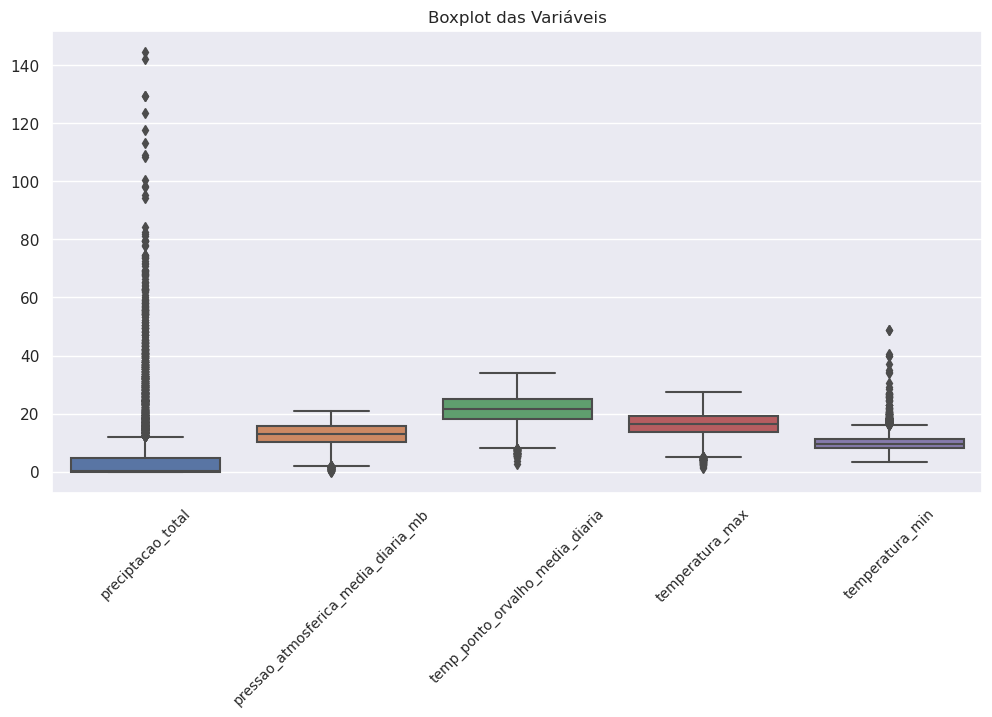

In [33]:
# Selecionar as colunas relevantes
data = df[['preciptacao_total', 'pressao_atmosferica_media_diaria_mb',
           'temp_ponto_orvalho_media_diaria', 'temperatura_max', 'temperatura_min']]

# Boxplot para cada variável
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title('Boxplot das Variáveis')
plt.xticks(rotation=45, fontsize=10)
plt.show()

## REMOVER OUTLIERS

In [19]:
# Calcular quartis
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Remover outliers baseados no IQR
data_cleaned = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f'Dataset original: {data.shape}')
print(f'Dataset sem outliers: {data_cleaned.shape}')

Dataset original: (5731, 5)
Dataset sem outliers: (4578, 5)


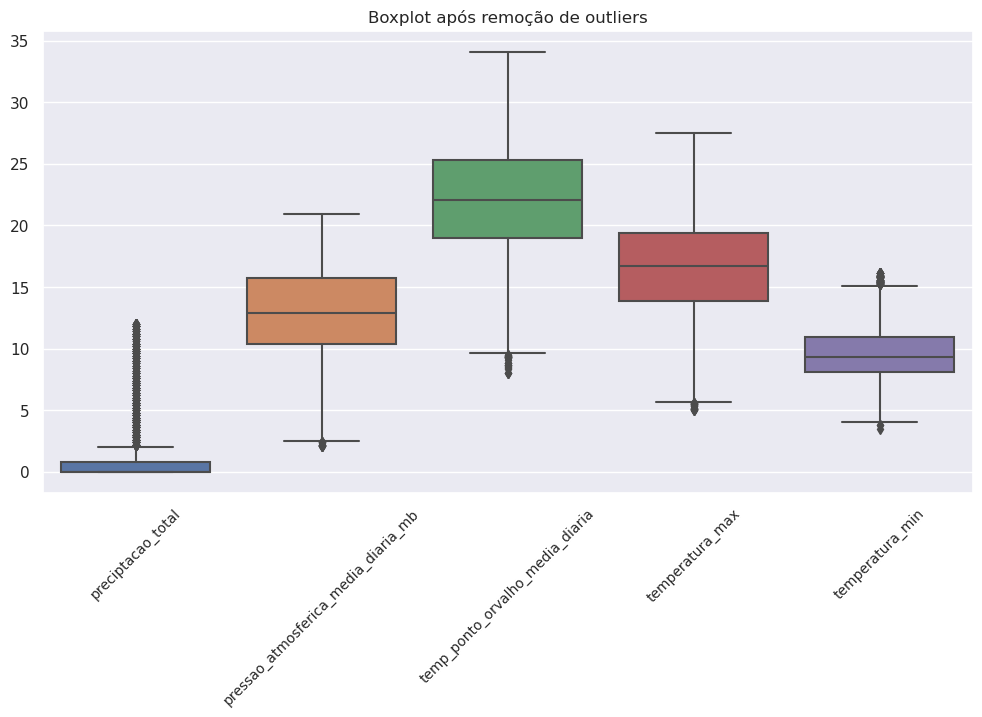

In [32]:
# Selecionar as colunas relevantes
data = df[['preciptacao_total', 'pressao_atmosferica_media_diaria_mb',
           'temp_ponto_orvalho_media_diaria', 'temperatura_max', 'temperatura_min']]

# Boxplot para cada variável
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned)
plt.title('Boxplot após remoção de outliers')
plt.xticks(rotation=45, fontsize=10)
plt.show()

# GRÁFICOS

## Correlação Spearman
O método de Spearman é uma ferramenta valiosa para analisar a correlação entre variáveis com distribuições não paramétricas. Sua robustez à presença de outliers e sua fácil interpretação o tornam uma escolha adequada para diversos tipos de dados.

- Já testei anteriormente com mais variáveis na matriz, optei por deixar apenas as que apresentaram maior correlação com a preciptação total;

- Testei também com valores de anos e meses específicos e os valores da correlação não mudam muito, por isso deixei a correlação dos dados no geral.

In [21]:
cols = ['preciptacao_total', 'pressao_atmosferica_media_diaria_mb',
        'temp_ponto_orvalho_media_diaria', 'temperatura_max',
        'temperatura_min']

# df[cols].corr(method='spearman')
data_cleaned.corr(method='spearman')

preciptacao_total  \
preciptacao_total                             1.000000   
pressao_atmosferica_media_diaria_mb           0.078226   
temp_ponto_orvalho_media_diaria              -0.300821   
temperatura_max                              -0.189817   
temperatura_min                              -0.101607   

                                     pressao_atmosferica_media_diaria_mb  \
preciptacao_total                                               0.078226   
pressao_atmosferica_media_diaria_mb                             1.000000   
temp_ponto_orvalho_media_diaria                                 0.680356   
temperatura_max                                                 0.840489   
temperatura_min                                                 0.093534   

                                     temp_ponto_orvalho_media_diaria  \
preciptacao_total                                          -0.300821   
pressao_atmosferica_media_diaria_mb                         0.680356   
temp_ponto_orvalho_media_diaria                             1.000000   
temperatura_max                                             0.924912   
temperatura_min                                             0.199749   

                                     temperatura_max  temperatura_min  
preciptacao_total                          -0.189817        -0.101607  
pressao_atmosferica_media_diaria_mb         0.840489         0.093534  
temp_ponto_orvalho_media_diaria             0.924912         0.199749  
temperatura_max                             1.000000         0.188453  
temperatura_min                             0.188453         1.000000

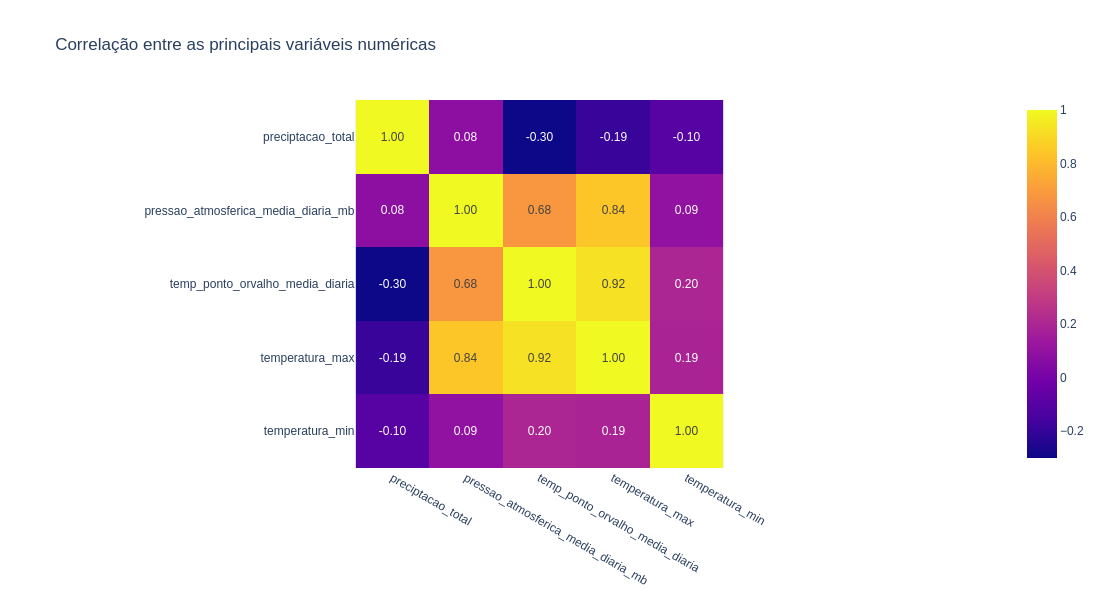

In [22]:
# Calcula a matriz de correlação usando o método Spearman
# data_selecionada = df[cols].loc[df['mes'] == 7] 
# data_selecionada = data_selecionada.corr(method='spearman')

# data_cleaned

correlation_matrix = data_cleaned.corr(method='spearman')

# Create the heatmap
fig = px.imshow(correlation_matrix, title='Correlação entre as principais variáveis numéricas')

# Update traces with text template
fig.update_traces(texttemplate="%{z:.2f}")  # Customize format

# Update figure size
fig.update_layout(width=790, height=600) 

# Show the heatmap
fig.show()

---

## ESCOLHA DA VARIÁVEL DEPENDENTE
Devido a falta de correlação das variáveis do dataset com a "preciptação" que eu havia determinado como variável dependente, mudei a minha estratégia e decidi colocar a temperatura máxima como variável dependente.

- Tentei excluir outliers;  
- Tentei outras análises para dados não paramétricos e não lineares e mesmo assim o resultado do R² sempre foi muito baixo < 0.14

__DEPENDENTE:__ temperatura_max  
__INDEPENDETES:__ pressao_atmosferica_media_diaria_mb, temp_ponto_orvalho_media_diaria

## REGRESSÃO LINEAR

__DEPENDENTE:__ temperatura_max  
__INDEPENDETE:__ temp_ponto_orvalho_media_diaria

__Por que escolhi a temperatura média diária do ponto de orvalho?__  
R: Porque é a variável que mais tem relação com a temperatura máxima.

In [23]:
# Definir as variáveis independentes (X) e dependentes (y)
X = df['temp_ponto_orvalho_media_diaria']  # independente
y = df['temperatura_max']                  # dependente

# Adicionar uma constante à variável independente (intercepto)
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Imprimir os resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        temperatura_max   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                 2.784e+04
Date:                Fri, 31 May 2024   Prob (F-statistic):               0.00
Time:                        19:58:46   Log-Likelihood:                -11423.
No. Observations:                5731   AIC:                         2.285e+04
Df Residuals:                    5729   BIC:                         2.286e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### Interpretação do Resultado:

1. R-quadrado (R-squared): O valor de R-quadrado é 0.829, o que significa que aproximadamente 82.9% da variabilidade na variável dependente (temperatura máxima) é explicada pela variável independente (temperatura do ponto de orvalho média diária). Isso indica que o modelo de regressão linear simples ajustado explica uma quantidade significativa da variação na temperatura máxima com base na temperatura do ponto de orvalho média diária.

2. Coeficientes: O coeficiente para a variável independente (temp_ponto_orvalho_media_diaria) é 0.7643. Isso significa que, para cada aumento de uma unidade na temperatura do ponto de orvalho média diária, espera-se um aumento de 0.7643 unidades na temperatura máxima. Portanto, há uma relação positiva entre essas duas variáveis.

3. P-value: O p-value associado ao coeficiente da variável independente é muito baixo (aproximadamente 0.000), o que sugere que a relação entre a temperatura do ponto de orvalho média diária e a temperatura máxima é estatisticamente significativa.

4. Intercepto: O intercepto (const) é -0.1776. Isso representa o valor estimado da temperatura máxima quando a temperatura do ponto de orvalho média diária é zero. No contexto deste modelo, isso pode não ter uma interpretação prática, já que valores de temperatura do ponto de orvalho média diária podem não atingir zero.

__Com base nesses resultados, podemos concluir que a temperatura do ponto de orvalho média diária é um preditor significativo da temperatura máxima.__

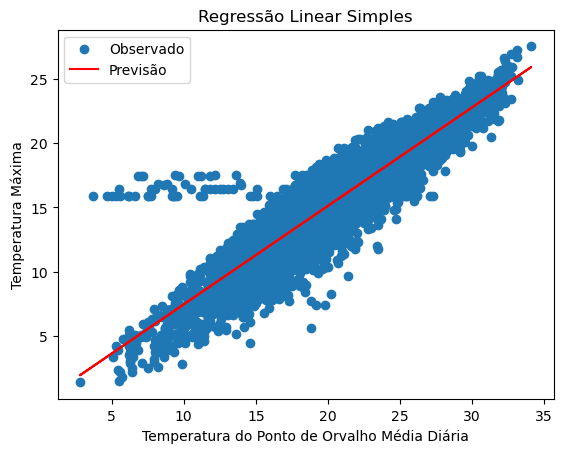

In [24]:
# Fazer previsões usando o modelo ajustado
predictions = model.predict(X)

# Plotar o gráfico de dispersão
plt.scatter(X['temp_ponto_orvalho_media_diaria'], y, label='Observado')
plt.plot(X['temp_ponto_orvalho_media_diaria'], predictions, color='red', label='Previsão')
plt.xlabel('Temperatura do Ponto de Orvalho Média Diária')
plt.ylabel('Temperatura Máxima')
plt.title('Regressão Linear Simples')
plt.legend()
plt.show()

---

## REGRESSÃO LINEAR MÚLTIPLA
O modelo de regressão linear múltipla é um modelo estatístico versátil para avaliar relacionamentos entre um destino contínuo e os preditores.  

__DEPENDENTE:__ temperatura_max  
__INDEPENDETES:__ pressao_atmosferica_media_diaria_mb, temp_ponto_orvalho_media_diaria (porque são as que possuem maior correlação com a variável dependente)

Mean Squared Error: 1.064147447523095
R^2 Score: 0.9379570782747133
Coefficients: [0.41846003 0.55181092]
Intercept: -1.022670712961233
                                     Coefficient
pressao_atmosferica_media_diaria_mb     0.418460
temp_ponto_orvalho_media_diaria         0.551811


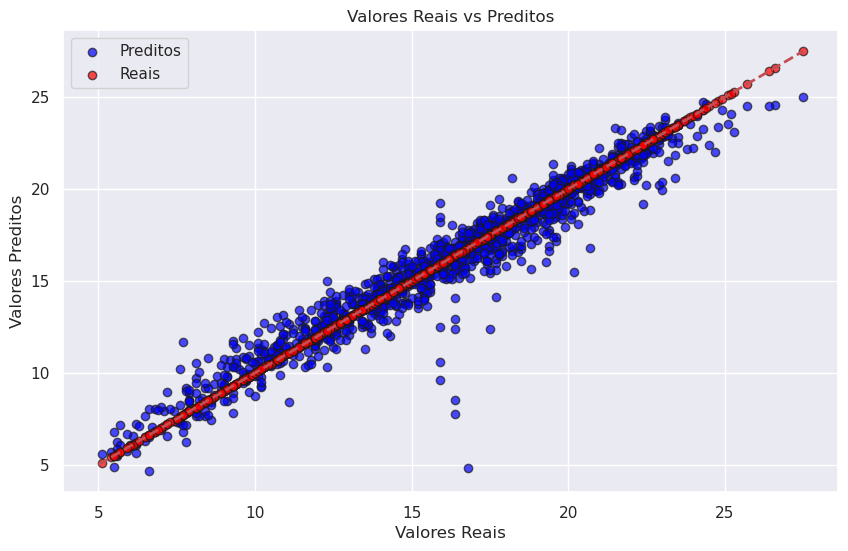

In [25]:
# Configurar o estilo do seaborn
sns.set()

# Separar as variáveis dependente e independentes
X = data_cleaned[['pressao_atmosferica_media_diaria_mb', 'temp_ponto_orvalho_media_diaria']]
y = data_cleaned['temperatura_max']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Coeficientes do modelo
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Exibir os coeficientes com nomes das variáveis
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Plotar os valores reais vs preditos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7, label='Preditos', color='blue')
plt.scatter(y_test, y_test, edgecolor='k', alpha=0.7, label='Reais', color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs Preditos')
plt.legend()
plt.show()

## REGRESSÃO LOGÍSTICA
É uma técnica recomendada para situações em que a
variável dependente é de natureza dicotômica ou
binária. Quanto às independentes, tanto podem ser
categóricas ou não.

In [26]:
# Mapear as estações do ano para categorias "calor" e "frio"
# Aqui estamos considerando que "primavera" e "verão" são categorias de calor,
# enquanto "outono" e "inverno" são categorias de frio. Você pode ajustar isso conforme necessário.
season_mapping = {
    'Primavera': 'Calor',
    'Verão': 'Calor',
    'Outono': 'Frio',
    'Inverno': 'Frio'
}

df['categoria_temperatura'] = df['estacao_ano'].map(season_mapping)

# Definir as variáveis independentes
X = df[['preciptacao_total', 'pressao_atmosferica_media_diaria_mb', 'temp_ponto_orvalho_media_diaria', 'temperatura_max', 'temperatura_min']]

# Definir a variável de resposta binária
y = df['categoria_temperatura']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Matriz de Confusão:
[[604 261]
 [242 613]]

Relatório de Classificação:
              precision    recall  f1-score   support

       Calor       0.71      0.70      0.71       865
        Frio       0.70      0.72      0.71       855

    accuracy                           0.71      1720
   macro avg       0.71      0.71      0.71      1720
weighted avg       0.71      0.71      0.71      1720



### Analisando o Resultado:

__Matriz de Confusão:__
- Verdadeiro Positivo (TP): 613 (previsões corretas de "calor")
- Falso Positivo (FP): 261 (previsões incorretas de "frio" como "calor")
- Falso Negativo (FN): 242 (previsões incorretas de "calor" como "frio")
- Verdadeiro Negativo (TN): 604 (previsões corretas de "frio")

__Relatório de Classificação:__
- Precision: A precisão para a categoria "calor" é de 0.71, o que significa que cerca de 71% das previsões de "calor" estão corretas. Da mesma forma, a precisão para a categoria "frio" é de 0.70, o que significa que cerca de 70% das previsões de "frio" estão corretas.
- Recall: O recall para a categoria "calor" é de 0.70, o que significa que o modelo identificou corretamente cerca de 70% de todos os casos reais de "calor". Para a categoria "frio", o recall é de 0.72, o que significa que o modelo identificou corretamente cerca de 72% de todos os casos reais de "frio".
- F1-score: O F1-score é a média harmônica da precisão e do recall. Tanto para "calor" quanto para "frio", o F1-score é de aproximadamente 0.71, o que indica um bom equilíbrio entre precisão e recall para ambas as categorias.
- Accuracy: A precisão global do modelo é de 0.71, o que significa que cerca de 71% das previsões estão corretas.

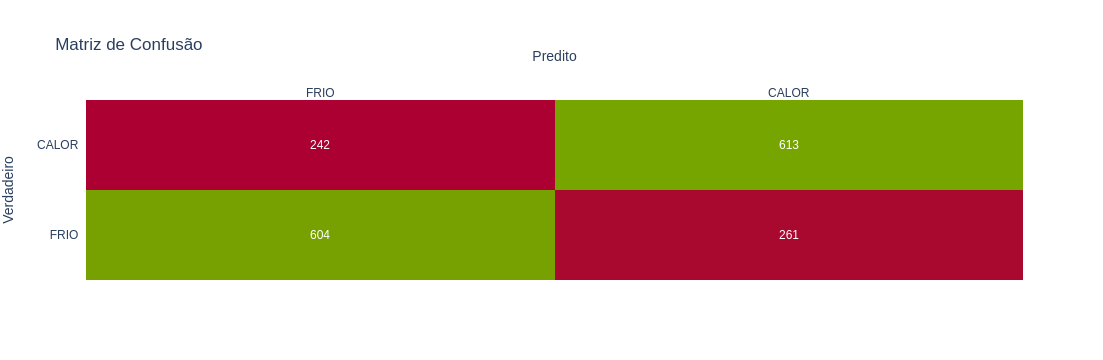

In [27]:
# Definir as classes reais e previstas para a matriz de confusão
classes = ['FRIO', 'CALOR']

# Definir uma escala de cores personalizada
colorscale = [[0.0, '#ac0032'],  # Cor para valores zero
              [1.0, '#76a500']]  # Cor para valores máximos

# Plotar a matriz de confusão
fig = ff.create_annotated_heatmap(confusion_matrix(y_test, y_pred), x=classes, y=classes, colorscale=colorscale)

# Personalizar o layout do gráfico
fig.update_layout(
    title='Matriz de Confusão',
    xaxis_title='Predito',
    yaxis_title='Verdadeiro'
)

# Mostrar o gráfico
fig.show()

## REGRESSÃO NÃO LINEAR (regressão polinomial)
A regressão polinomial é uma extensão da regressão linear simples que permite modelar relacionamentos não lineares entre uma variável independente e uma variável dependente. Enquanto a regressão linear assume uma relação linear entre as variáveis, a regressão polinomial permite capturar padrões mais complexos nos dados, ajustando um polinômio de grau superior à relação entre as variáveis.

Essencialmente, a regressão polinomial ajusta uma curva polinomial aos dados em vez de uma linha reta, o que pode ser útil quando os dados exibem um padrão curvilíneo. Isso pode ocorrer quando a relação entre as variáveis não é estritamente linear, mas pode ser melhor descrita por uma curva suave.

R-squared: 0.830954042702434


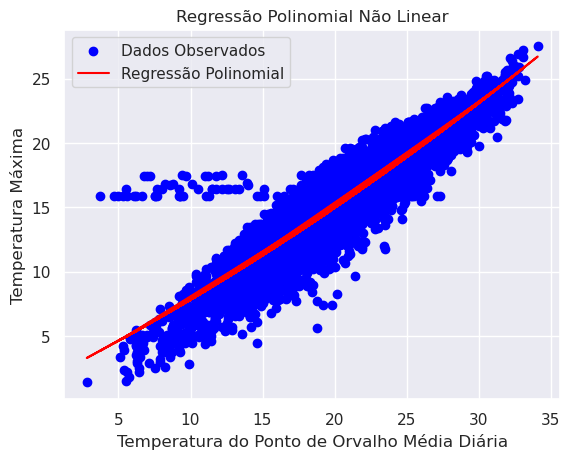

In [28]:
# X e y devem ser 1D numpy arrays
X = df['temp_ponto_orvalho_media_diaria'].values
y = df['temperatura_max'].values

# Transformando os dados de entrada para incluir características polinomiais até um certo grau (por exemplo, grau 2)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X.reshape(-1, 1))

# Ajustando o modelo de regressão linear aos dados transformados
model = LinearRegression()
model.fit(X_poly, y)

# Fazendo previsões com o modelo ajustado
y_pred = model.predict(X_poly)

# Calculando o coeficiente de determinação (R-quadrado)
r2 = r2_score(y, y_pred)
print("R-squared:", r2)

# Plotando os resultados
plt.scatter(X, y, color='blue', label='Dados Observados')
plt.plot(X, y_pred, color='red', label='Regressão Polinomial')
plt.xlabel('Temperatura do Ponto de Orvalho Média Diária')
plt.ylabel('Temperatura Máxima')
plt.title('Regressão Polinomial Não Linear')
plt.legend()
plt.show()

## SÉRIES TEMPORAIS
A análise de séries temporais pode ajudar a entender e prever padrões climáticos sazonais, identificar mudanças climáticas ao longo do tempo e fornecer insights para tomada de decisões em agricultura, gestão de recursos hídricos e planejamento urbano, por exemplo. 
Resumindo, a análise de séries temporais é uma ferramenta essencial para compreender o comportamento de fenômenos ao longo do tempo e para realizar previsões úteis e informadas.

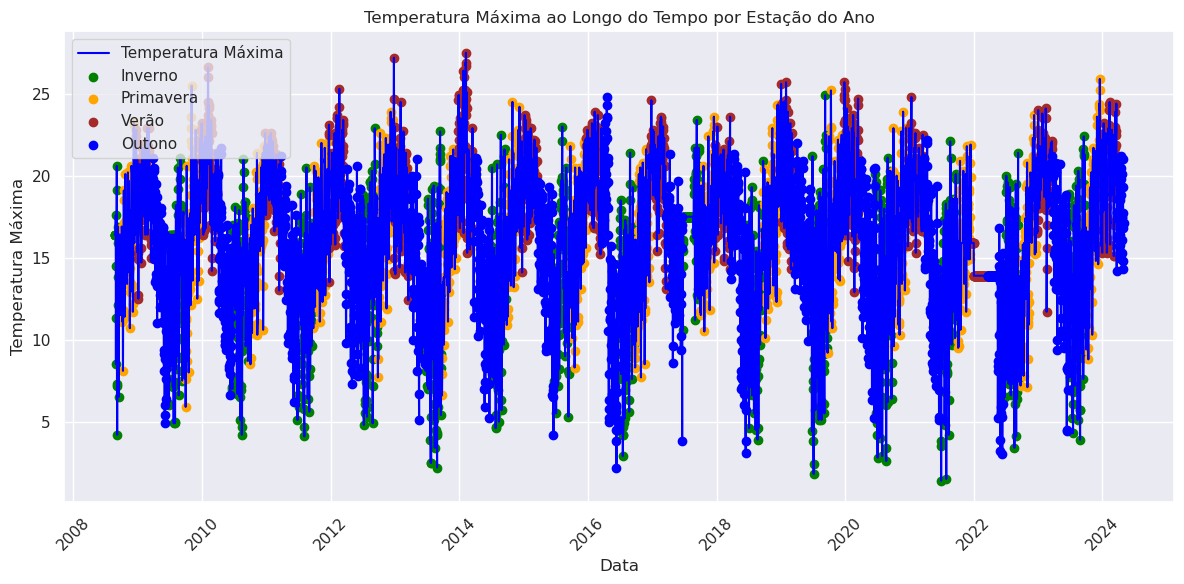

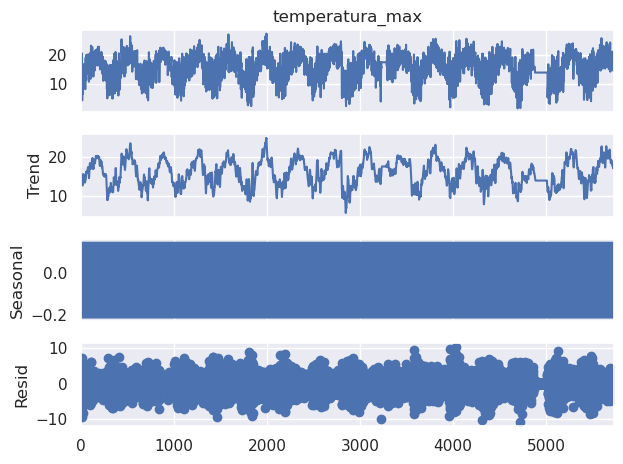

ADF Statistic: -5.285802189675519
p-value: 5.85889461614307e-06
5731    17.428816
5732    17.634627
5733    17.763447
5734    17.844077
5735    17.894545
5736    17.926134
5737    17.945905
5738    17.958281
5739    17.966027
5740    17.970875
5741    17.973909
Name: predicted_mean, dtype: float64


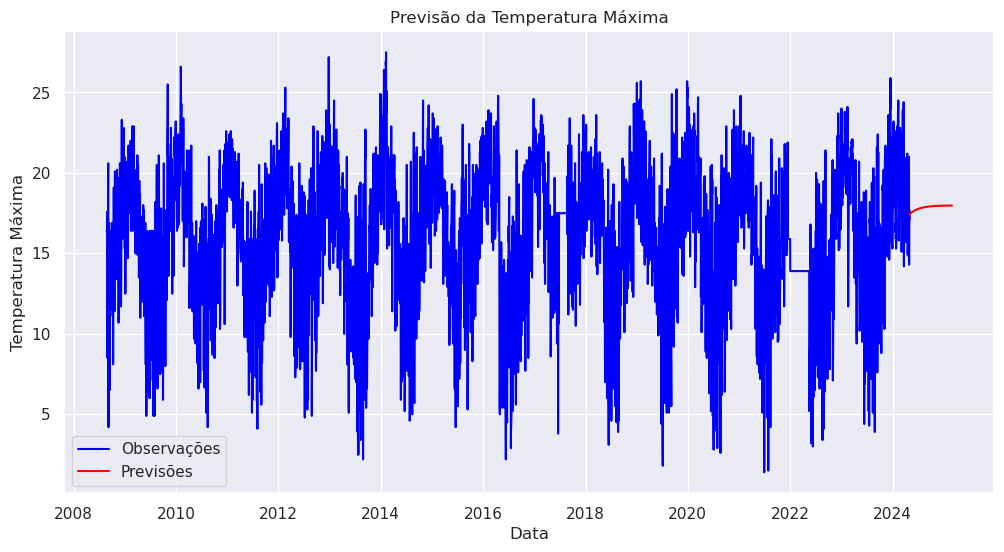

In [29]:
# Definindo o intervalo de datas para análise
start_date = df['data'].min()
end_date = df['data'].max()

# Filtrando o DataFrame para incluir apenas as observações dentro desse intervalo
df_filtered = df[(df['data'] >= start_date) & (df['data'] <= end_date)]

# Criando um gráfico de linha para visualizar a temperatura máxima ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['data'], df_filtered['temperatura_max'], label='Temperatura Máxima', color='blue')

# Adicionando informações de estação do ano ao gráfico
for season, color in zip(df_filtered['estacao_ano'].unique(), ['green', 'orange', 'brown', 'blue']):
    df_season = df_filtered[df_filtered['estacao_ano'] == season]
    plt.scatter(df_season['data'], df_season['temperatura_max'], color=color, label=season)

# Personalizando o gráfico
plt.xlabel('Data')
plt.ylabel('Temperatura Máxima')
plt.title('Temperatura Máxima ao Longo do Tempo por Estação do Ano')
plt.legend(loc='upper left')

# Rotacionando os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

######################################################################################

# Decomposição da Série Temporal
decomposition = seasonal_decompose(df['temperatura_max'], model='additive', period=12)
decomposition.plot()
plt.show()

# Teste de Estacionariedade (ADF Test)
result = adfuller(df['temperatura_max'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Modelagem (Exemplo: ARIMA)
modelo_arima = ARIMA(df['temperatura_max'], order=(1, 1, 1))
resultado_arima = modelo_arima.fit()

# Avaliação do Modelo
previsoes_arima = resultado_arima.predict(start=len(df), end=len(df) + 10)
print(previsoes_arima)

# Previsão
plt.figure(figsize=(12, 6))
plt.plot(df['data'], df['temperatura_max'], label='Observações', color='blue')
plt.plot(pd.date_range(start=df['data'].max(), periods=11, freq='ME'), previsoes_arima, label='Previsões', color='red')
plt.xlabel('Data')
plt.ylabel('Temperatura Máxima')
plt.title('Previsão da Temperatura Máxima')
plt.legend()
plt.show()

- ADF Statistic: O valor é -5.29. Este valor negativo sugere que a série temporal possui propriedades estacionárias, pois é menor do que os valores críticos.

- p-value: O valor é aproximadamente 5.86e-06, que é muito menor que 0.05. Isso indica que há forte evidência estatística para rejeitar a hipótese nula de que a série possui uma raiz unitária, sugerindo que a série é estacionária.

- Série Temporal (predicted_mean): Esses são os valores previstos da temperatura máxima para os próximos períodos. Eles foram gerados pelo modelo de série temporal ajustado aos dados históricos.

__Em resumo, com base nos resultados, podemos concluir que a série temporal de temperatura máxima é estacionária e os valores previstos fornecem estimativas razoáveis para a temperatura máxima nos próximos períodos.__